# IMPORTING LIBRARIES

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# READING THE DATASET

In [60]:
df=pd.read_csv('indian_liver_patient.csv')

In [61]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [62]:
df.shape

(583, 11)

In [63]:
df.info()#checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [64]:
df.describe()#statistical information

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [65]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [66]:
df['Total_Bilirubin'].skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0       0.7
1      10.9
2       7.3
3       1.0
4       3.9
       ... 
578     0.5
579     0.6
580     0.8
581     1.3
582     1.0
Name: Total_Bilirubin, Length: 583, dtype: float64>

In [67]:
df['Direct_Bilirubin'].skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0      0.1
1      5.5
2      4.1
3      0.4
4      2.0
      ... 
578    0.1
579    0.1
580    0.2
581    0.5
582    0.3
Name: Direct_Bilirubin, Length: 583, dtype: float64>

In [68]:
df['Alkaline_Phosphotase'].skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0      187
1      699
2      490
3      182
4      195
      ... 
578    500
579     98
580    245
581    184
582    216
Name: Alkaline_Phosphotase, Length: 583, dtype: int64>

In [69]:
df['Alamine_Aminotransferase'].skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0      16
1      64
2      60
3      14
4      27
       ..
578    20
579    35
580    48
581    29
582    21
Name: Alamine_Aminotransferase, Length: 583, dtype: int64>

In [70]:
df['Aspartate_Aminotransferase'].skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0       18
1      100
2       68
3       20
4       59
      ... 
578     34
579     31
580     49
581     32
582     24
Name: Aspartate_Aminotransferase, Length: 583, dtype: int64>

In [71]:
df['Total_Protiens'].skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0      6.8
1      7.5
2      7.0
3      6.8
4      7.3
      ... 
578    5.9
579    6.0
580    6.4
581    6.8
582    7.3
Name: Total_Protiens, Length: 583, dtype: float64>

In [72]:
df['Albumin'].skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0      3.3
1      3.2
2      3.3
3      3.4
4      2.4
      ... 
578    1.6
579    3.2
580    3.2
581    3.4
582    4.4
Name: Albumin, Length: 583, dtype: float64>

In [73]:
df['Albumin_and_Globulin_Ratio'].skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0      0.90
1      0.74
2      0.89
3      1.00
4      0.40
       ... 
578    0.37
579    1.10
580    1.00
581    1.00
582    1.50
Name: Albumin_and_Globulin_Ratio, Length: 583, dtype: float64>

# VALUE COUNTS

In [74]:
#categorical columns

In [75]:
df['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [76]:
df['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

# CHECKING NULL VALUES

In [77]:
df.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [78]:
#there are no null values

# DATA VISUALIZATION

## UNIVARIATE ANALYSIS

In [79]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<AxesSubplot:xlabel='Age', ylabel='Density'>

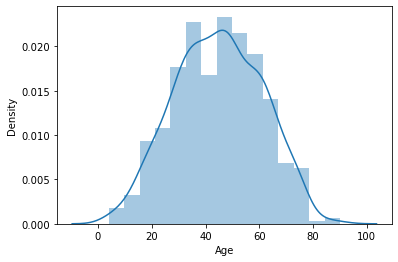

In [80]:
sns.distplot(df.Age)

<AxesSubplot:xlabel='Age'>

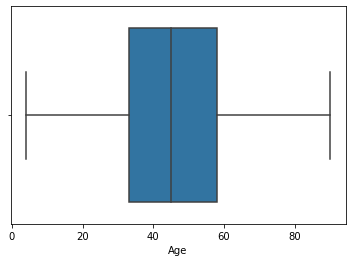

In [81]:
sns.boxplot(df.Age)

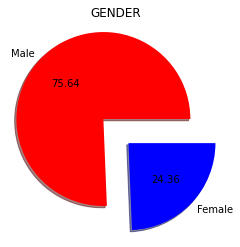

In [82]:
#gender using pie chart
plt.pie(df['Gender'].value_counts(),[0.2,0.2],labels=['Male','Female'],colors=['red','blue'],autopct="%.2f",shadow=True)
plt.title('GENDER')
plt.show()

In [83]:
#Since it is a categorial column we have to encode it so that machine can understand it

<AxesSubplot:xlabel='Total_Bilirubin'>

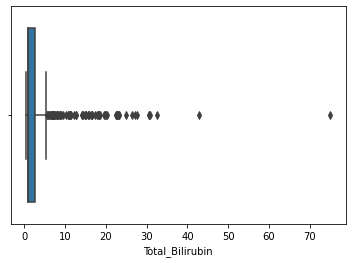

In [84]:
sns.boxplot(df['Total_Bilirubin'])

<AxesSubplot:xlabel='Direct_Bilirubin'>

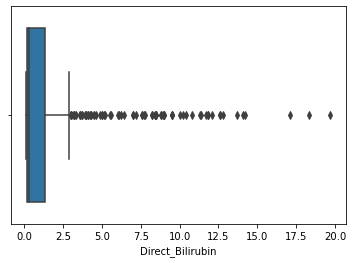

In [85]:
sns.boxplot(df['Direct_Bilirubin'])

<AxesSubplot:xlabel='Alkaline_Phosphotase'>

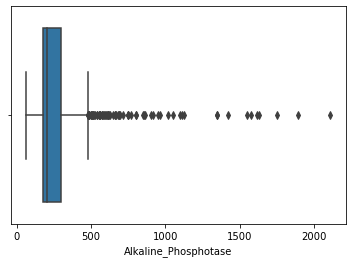

In [86]:
sns.boxplot(df['Alkaline_Phosphotase'])

<AxesSubplot:xlabel='Alamine_Aminotransferase'>

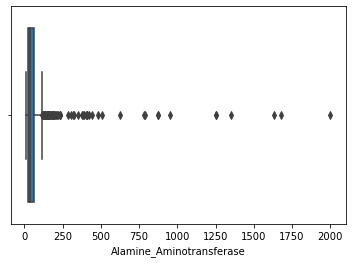

In [87]:
sns.boxplot(df['Alamine_Aminotransferase'])

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

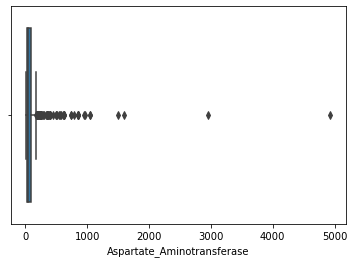

In [88]:
sns.boxplot(df['Aspartate_Aminotransferase'])

<AxesSubplot:xlabel='Albumin'>

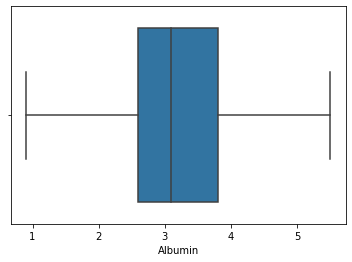

In [89]:
sns.boxplot(df['Albumin'])

<AxesSubplot:xlabel='Albumin_and_Globulin_Ratio'>

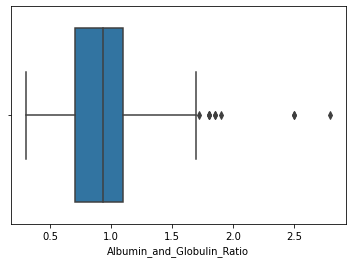

In [90]:
sns.boxplot(df['Albumin_and_Globulin_Ratio'])

## BIVARIATE ANALYSIS

In [91]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<AxesSubplot:xlabel='Age', ylabel='Gender'>

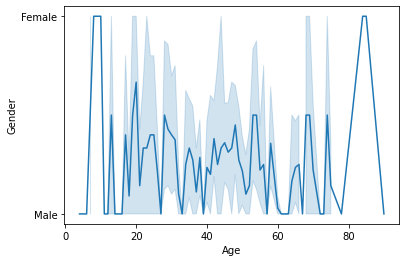

In [92]:
sns.lineplot(df.Age,df.Gender)

<AxesSubplot:xlabel='Age', ylabel='Gender'>

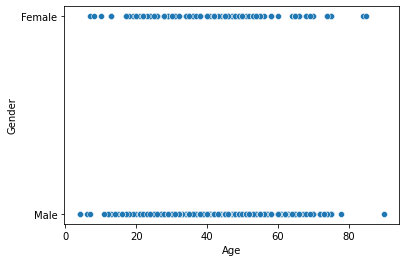

In [93]:
sns.scatterplot(df.Age,df.Gender)

Text(0, 0.5, 'Alamine_Aminotransferase')

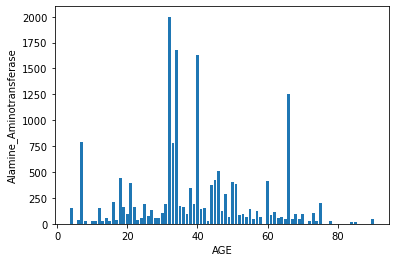

In [94]:
plt.bar(df.Age,df.Alamine_Aminotransferase)
plt.xlabel('AGE')
plt.ylabel('Alamine_Aminotransferase')

Text(0, 0.5, 'Albumin')

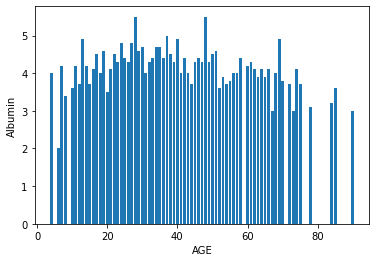

In [95]:
plt.bar(df.Age,df.Albumin)
plt.xlabel('AGE')
plt.ylabel('Albumin')

<AxesSubplot:xlabel='Albumin', ylabel='Albumin_and_Globulin_Ratio'>

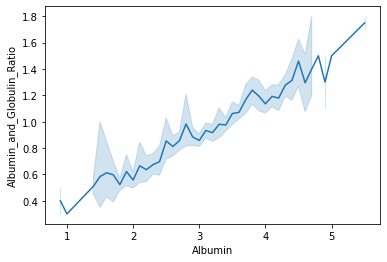

In [96]:
sns.lineplot(df.Albumin,df.Albumin_and_Globulin_Ratio)

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


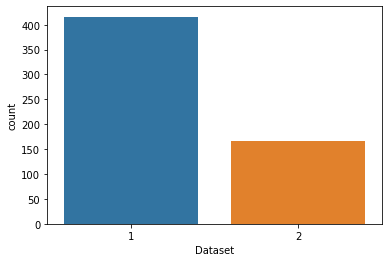

In [97]:
# Plotting the Number of patients with liver disease vs Number of patients with no liver disease
sns.countplot(data=df, x = 'Dataset', label='Count')

LD, NLD = df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  441
Number of patients that are female:  142


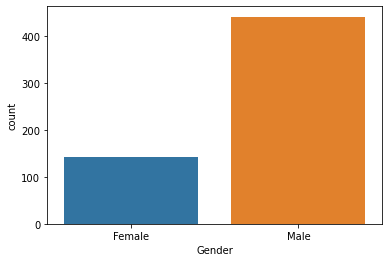

In [98]:
# Plotting the Number of Male and Female patients
sns.countplot(data=df, x = 'Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

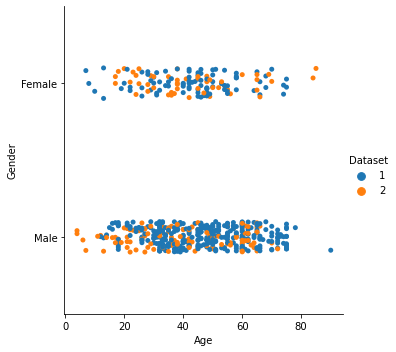

In [99]:
sns.catplot(x="Age", y="Gender", hue="Dataset", data=df)

In [100]:
df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).mean().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,42.740000
3,2,Male,40.598291
0,1,Female,43.347826
1,1,Male,46.950617


Text(0.5, 0.98, 'Disease by Gender and Age')

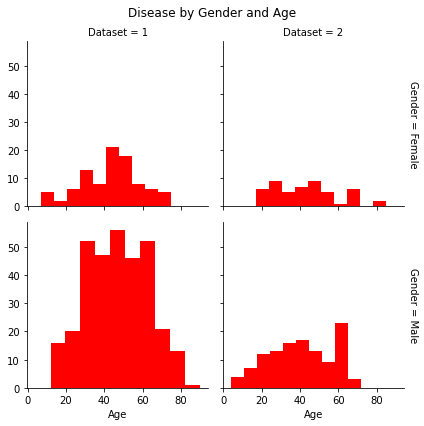

In [104]:
# Plotting Age vs Gender
g = sns.FacetGrid(df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age')

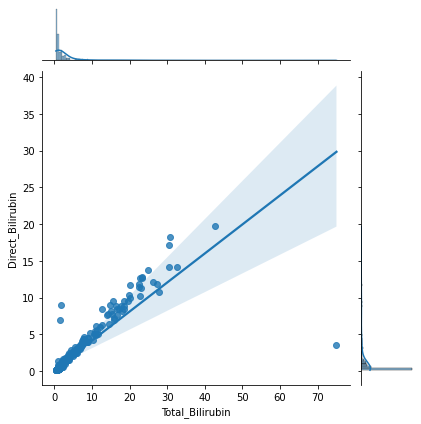

In [106]:
# Plotting Total_Bilirubin vs Direct_Bilirubin
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=df, kind="reg")

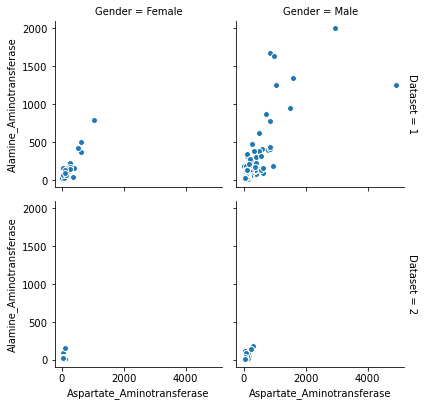

In [107]:
# Plotting Gender(Male/Female) along with Aspartate Aminotransferase, Alamine Aminotransferase
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

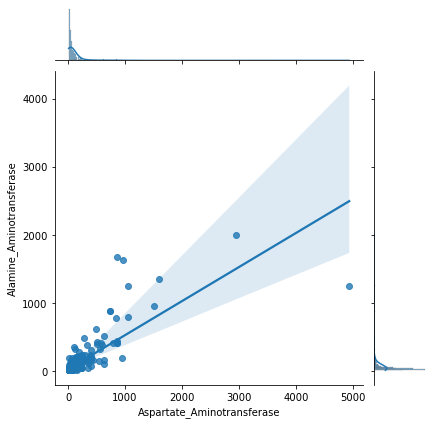

In [108]:
# Plotting Aspartate_Aminotransferase vs Alamine_Aminotransferase
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=df, kind="reg")

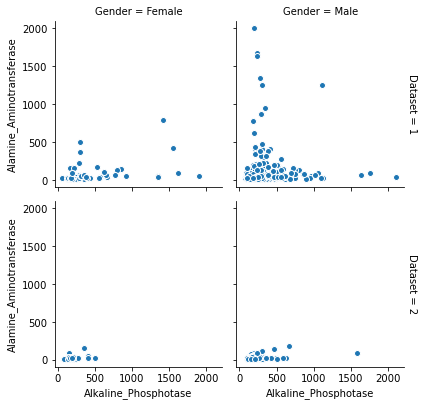

In [109]:
# Plotting Gender(Male/Female) along with Alkaline_Phosphotase and Alamine_Aminotransferase
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

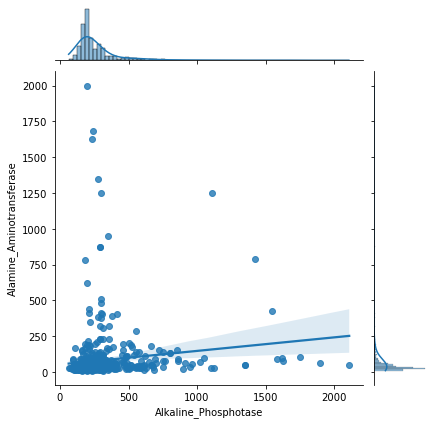

In [110]:
# Plotting Alkaline_Phosphotase vs Alamine_Aminotransferase
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=df, kind="reg")

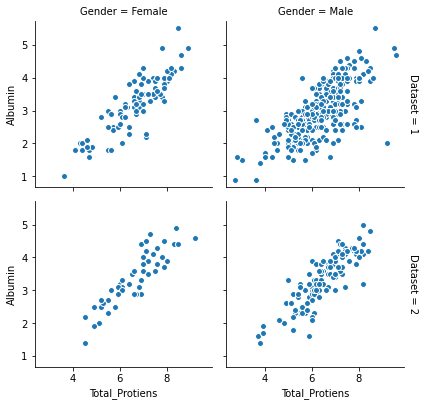

In [111]:
# Plotting Gender(Male/Female) along with Total_Protiens and Albumin
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

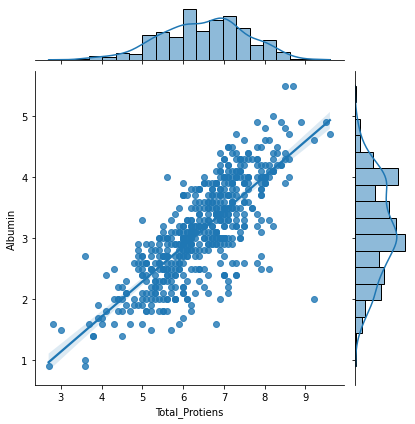

In [112]:
# Plotting Total_Protiens vs Albumin
sns.jointplot("Total_Protiens", "Albumin", data=df, kind="reg")

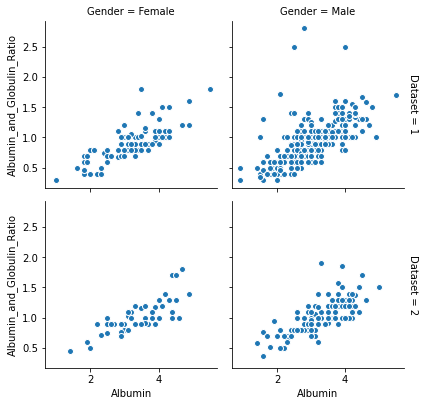

In [113]:
# Plotting Gender(Male/Female) along with Albumin and Albumin_and_Globulin_Ratio
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

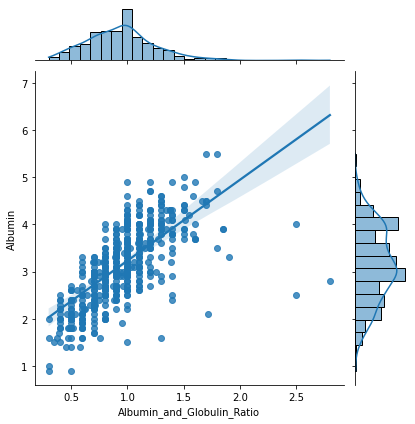

In [114]:
# Plotting Albumin vs Albumin_and_Globulin_Ratio
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=df, kind="reg")

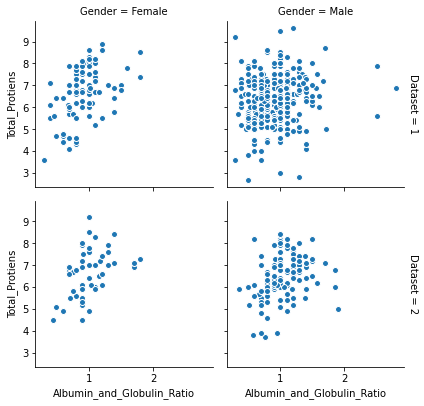

In [115]:
# Plotting Gender(Male/Female) along with Albumin and Globulin Ratio and Total Protiens
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)

# ENCODING GENDER ->FEATURE ENGINEERING

In [116]:
df.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


In [117]:
pd.get_dummies(df['Gender'], prefix = 'Gender').head()

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [119]:
# Concatination
liver_df = pd.concat([df,pd.get_dummies(df['Gender'], prefix = 'Gender')], axis=1)

In [120]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [121]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [122]:
df[df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [123]:
df["Albumin_and_Globulin_Ratio"] = df.Albumin_and_Globulin_Ratio.fillna(df['Albumin_and_Globulin_Ratio'].mean())

## MULTI VARIATE ANALYSIS

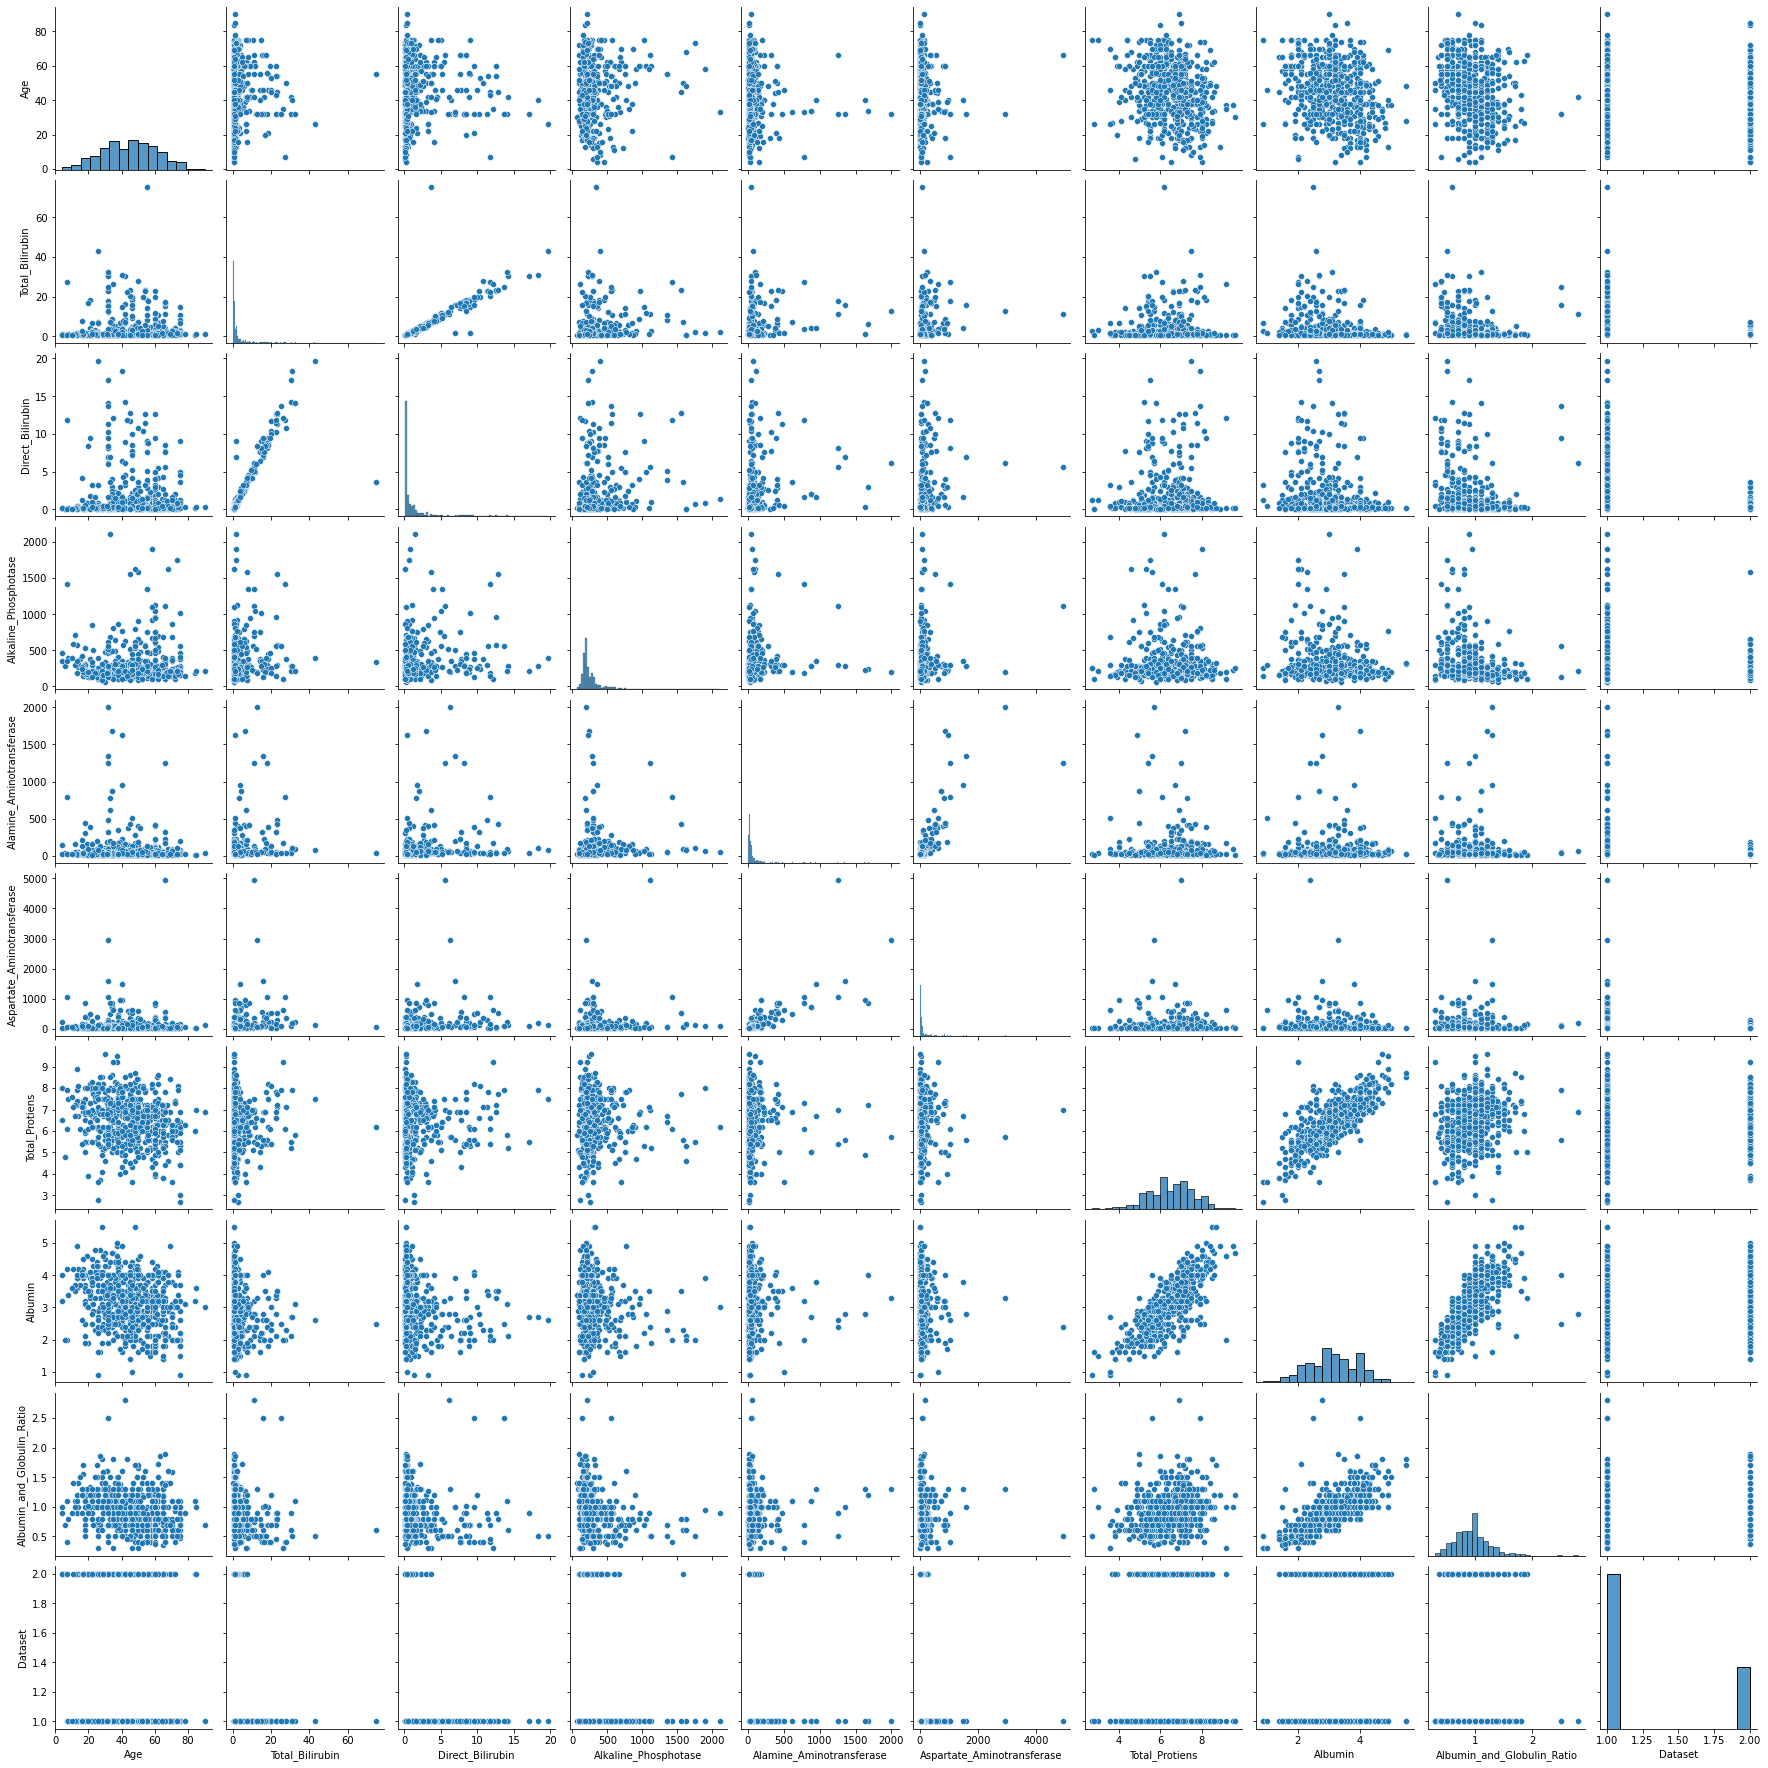

In [101]:
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Total_Bilirubin'}>,
        <AxesSubplot:title={'center':'Direct_Bilirubin'}>],
       [<AxesSubplot:title={'center':'Alkaline_Phosphotase'}>,
        <AxesSubplot:title={'center':'Alamine_Aminotransferase'}>,
        <AxesSubplot:title={'center':'Aspartate_Aminotransferase'}>],
       [<AxesSubplot:title={'center':'Total_Protiens'}>,
        <AxesSubplot:title={'center':'Albumin'}>,
        <AxesSubplot:title={'center':'Albumin_and_Globulin_Ratio'}>],
       [<AxesSubplot:title={'center':'Dataset'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

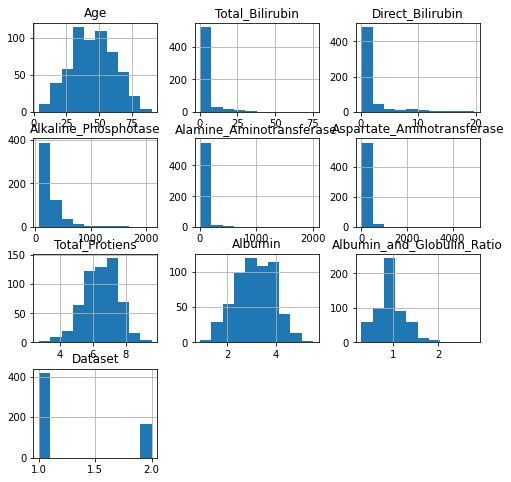

In [102]:
df.hist(figsize=(8,8))


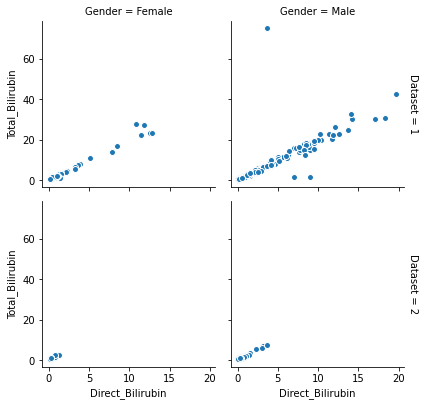

In [105]:
# Plotting Gender(Male/Female) along with Total_Bilirubin and Direct_Bilirubin
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

<AxesSubplot:>

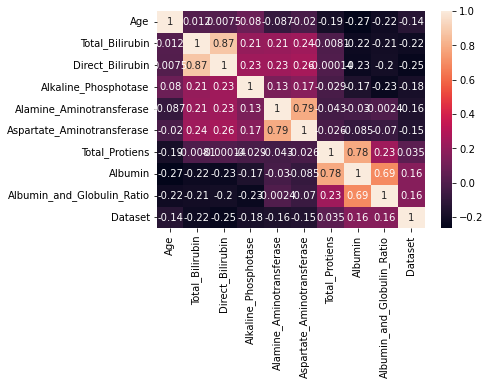

In [103]:
sns.heatmap(df.corr(),annot=True)